In [1]:
import sys
sys.path.append('/Users/tunadorable/local-repos/next-concept-predictor/venv/lib/python3.11/site-packages')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
def calculate_lengths_and_confidence_interval(X):
    # Calculate the length of each vector
    lengths = np.sqrt(np.sum(X**2, axis=1))

    # Calculate the average length and the 95% confidence interval
    avg_length = np.mean(lengths)
    conf_interval = norm.interval(0.95, loc=avg_length, scale=np.std(lengths, ddof=1) / np.sqrt(len(lengths)))
    
    return avg_length, conf_interval

In [4]:
def generate_data_and_plot(b=1000, max_d=200, step=10):
    # Initialize arrays to store the results
    dimensions = range(1, max_d+1, step)
    avg_lengths = []
    conf_intervals_lower = []
    conf_intervals_upper = []

    # Generate data and calculate lengths and confidence intervals for each dimension
    for d in dimensions:
        X = np.random.normal(0, 1, (b, d))
        avg_length, conf_interval = calculate_lengths_and_confidence_interval(X)
        avg_lengths.append(avg_length)
        conf_intervals_lower.append(conf_interval[0])
        conf_intervals_upper.append(conf_interval[1])

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(dimensions, avg_lengths, label="Average Length")
    plt.fill_between(dimensions, conf_intervals_lower, conf_intervals_upper, alpha=0.2, label="95% Confidence Interval")
    plt.xlabel("Embedding Dimension (d)")
    plt.ylabel("Average Length of Vectors")
    plt.title("Average Length of Normally Distributed Vectors in High-Dimensional Space")
    plt.legend()
    plt.grid(True)
    plt.show()

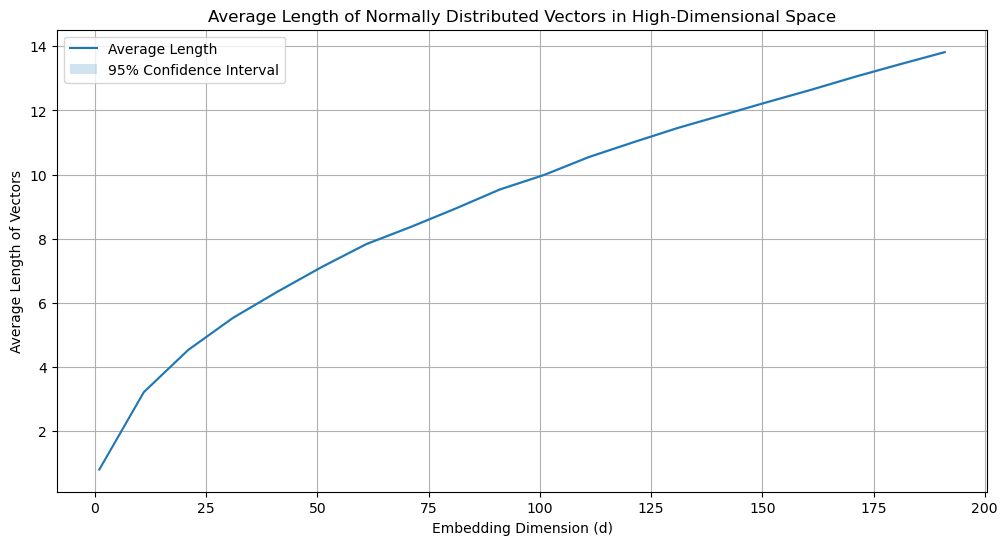

In [5]:
# Run the function with the specified parameters
generate_data_and_plot()

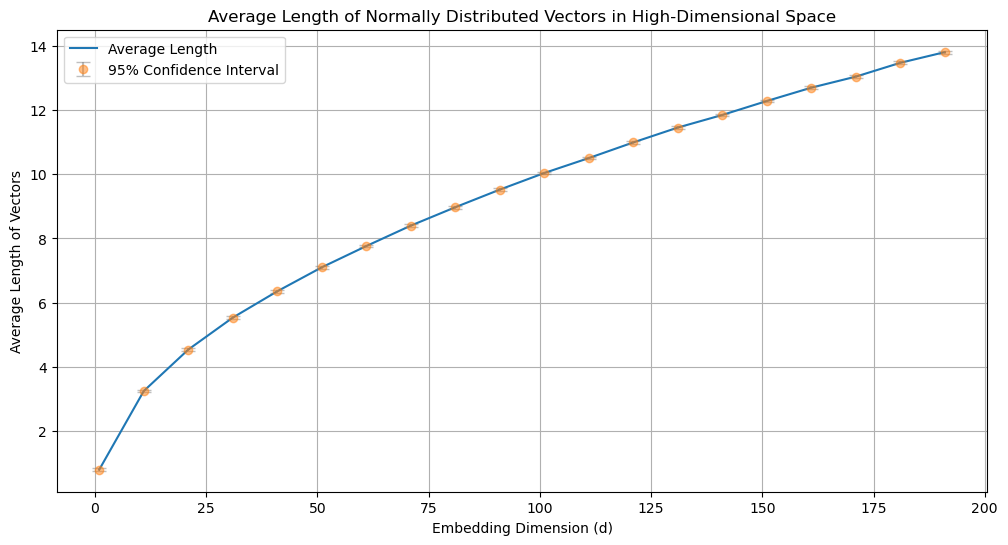

In [6]:
def generate_data_and_plot_fixed(b=1000, max_d=200, step=10):
    # Initialize arrays to store the results
    dimensions = range(1, max_d+1, step)
    avg_lengths = []
    conf_intervals_lower = []
    conf_intervals_upper = []

    # Generate data and calculate lengths and confidence intervals for each dimension
    for d in dimensions:
        X = np.random.normal(0, 1, (b, d))
        avg_length, conf_interval = calculate_lengths_and_confidence_interval(X)
        avg_lengths.append(avg_length)
        conf_intervals_lower.append(avg_length - conf_interval[0])
        conf_intervals_upper.append(conf_interval[1] - avg_length)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(dimensions, avg_lengths, label="Average Length")
    plt.errorbar(dimensions, avg_lengths, yerr=[conf_intervals_lower, conf_intervals_upper], fmt='o', ecolor='gray', alpha=0.5, capsize=5, label="95% Confidence Interval")
    plt.xlabel("Embedding Dimension (d)")
    plt.ylabel("Average Length of Vectors")
    plt.title("Average Length of Normally Distributed Vectors in High-Dimensional Space")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the function with the fixed visualization
generate_data_and_plot_fixed()


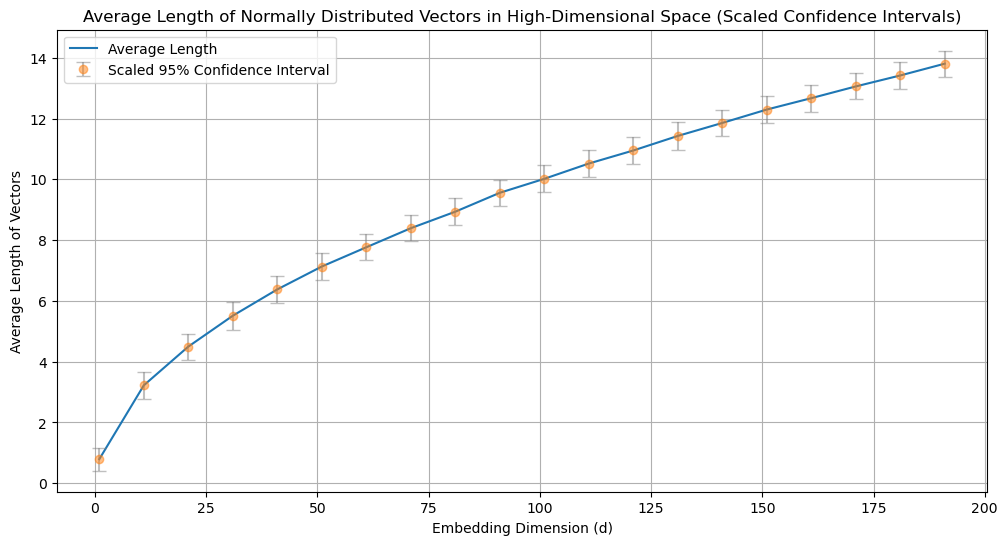

In [7]:
def generate_data_and_plot_scaled(b=1000, max_d=200, step=10, scale_factor=10):
    # Initialize arrays to store the results
    dimensions = range(1, max_d+1, step)
    avg_lengths = []
    conf_intervals_lower = []
    conf_intervals_upper = []

    # Generate data and calculate lengths and confidence intervals for each dimension
    for d in dimensions:
        X = np.random.normal(0, 1, (b, d))
        avg_length, conf_interval = calculate_lengths_and_confidence_interval(X)
        avg_lengths.append(avg_length)
        # Scale the confidence intervals for better visibility
        conf_intervals_lower.append(scale_factor * (avg_length - conf_interval[0]))
        conf_intervals_upper.append(scale_factor * (conf_interval[1] - avg_length))

    # Plot the results with scaled confidence intervals
    plt.figure(figsize=(12, 6))
    plt.plot(dimensions, avg_lengths, label="Average Length")
    plt.errorbar(dimensions, avg_lengths, yerr=[conf_intervals_lower, conf_intervals_upper], fmt='o', ecolor='gray', alpha=0.5, capsize=5, label="Scaled 95% Confidence Interval")
    plt.xlabel("Embedding Dimension (d)")
    plt.ylabel("Average Length of Vectors")
    plt.title("Average Length of Normally Distributed Vectors in High-Dimensional Space (Scaled Confidence Intervals)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the function with scaled confidence intervals
generate_data_and_plot_scaled()


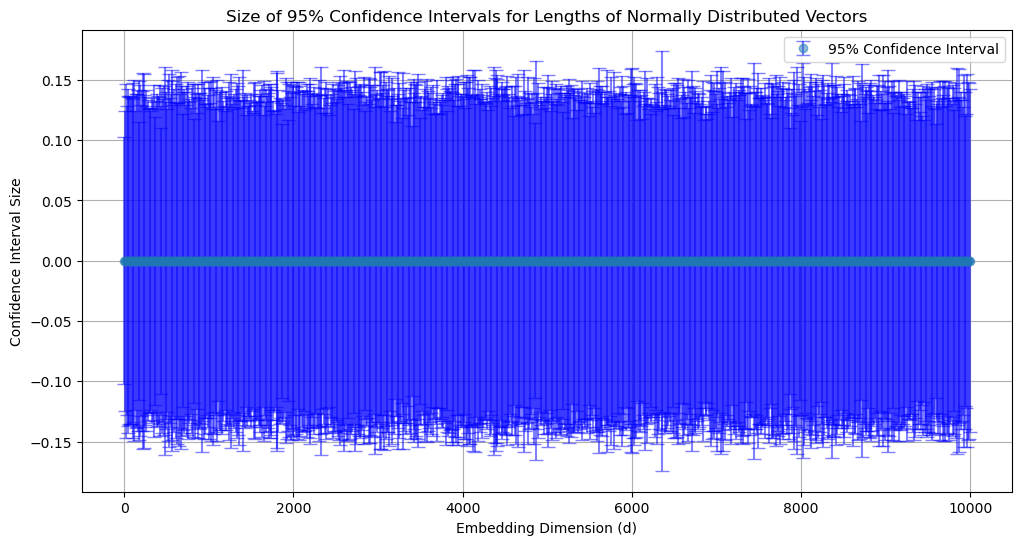

In [10]:
def plot_confidence_intervals_only(b=100, max_d=10000, step=10):
    # Initialize arrays to store the results
    dimensions = range(1, max_d+1, step)
    conf_intervals_lower = []
    conf_intervals_upper = []

    # Generate data and calculate confidence intervals for each dimension
    for d in dimensions:
        X = np.random.normal(0, 1, (b, d))
        avg_length, conf_interval = calculate_lengths_and_confidence_interval(X)
        conf_intervals_lower.append(avg_length - conf_interval[0])
        conf_intervals_upper.append(conf_interval[1] - avg_length)

    # Plot the confidence intervals without the averages
    plt.figure(figsize=(12, 6))
    plt.errorbar(dimensions, [0]*len(dimensions), yerr=[conf_intervals_lower, conf_intervals_upper], fmt='o', ecolor='blue', alpha=0.5, capsize=5, label="95% Confidence Interval")
    plt.xlabel("Embedding Dimension (d)")
    plt.ylabel("Confidence Interval Size")
    plt.title("Size of 95% Confidence Intervals for Lengths of Normally Distributed Vectors")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the function to plot only the confidence intervals
plot_confidence_intervals_only()


In [13]:
def analyze_confidence_interval_trend(b=100, max_d=50000, step=100):
    # Initialize arrays to store the results
    dimensions = range(1, max_d+1, step)
    avg_conf_interval_sizes = []

    # Generate data and calculate confidence intervals for each dimension
    for d in dimensions:
        X = np.random.normal(0, 1, (b, d))
        avg_length, conf_interval = calculate_lengths_and_confidence_interval(X)
        conf_interval_size = (conf_interval[1] - conf_interval[0]) / 2  # Average size of the confidence interval
        avg_conf_interval_sizes.append(conf_interval_size)

    # Calculate statistical properties
    conf_interval_stats = {
        "dimensions": list(dimensions),
        "avg_conf_interval_sizes": avg_conf_interval_sizes
    }

    return conf_interval_stats

# Run the analysis
conf_interval_stats = analyze_confidence_interval_trend()

In [14]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Convert the dictionary to a DataFrame for easier processing
df = pd.DataFrame(conf_interval_stats)

# Prepare the data for linear regression
X = df['dimensions'].values.reshape(-1, 1)  # Predictor variable
y = df['avg_conf_interval_sizes'].values     # Response variable

# Perform linear regression
model = LinearRegression().fit(X, y)

# Get the slope (coefficient) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Regression summary
regression_summary = {
    "slope": slope,
    "intercept": intercept,
    "r_squared": model.score(X, y)
}

regression_summary

{'slope': -1.9823886494619668e-08,
 'intercept': 0.13893808064360533,
 'r_squared': 0.0007983847524370979}

In [15]:
def analyze_relative_conf_interval_trend(b=100, max_d=10000, step=100):
    # Initialize arrays to store the results
    dimensions = range(1, max_d+1, step)
    relative_conf_interval_sizes = []

    # Generate data and calculate relative confidence intervals for each dimension
    for d in dimensions:
        X = np.random.normal(0, 1, (b, d))
        avg_length, conf_interval = calculate_lengths_and_confidence_interval(X)
        conf_interval_size = (conf_interval[1] - conf_interval[0]) / 2  # Average size of the confidence interval
        relative_size = conf_interval_size / avg_length if avg_length != 0 else 0
        relative_conf_interval_sizes.append(relative_size)

    # Prepare the data for statistical analysis
    relative_conf_interval_data = {
        "dimensions": list(dimensions),
        "relative_conf_interval_sizes": relative_conf_interval_sizes
    }

    return relative_conf_interval_data

# Run the analysis
relative_conf_interval_data = analyze_relative_conf_interval_trend()

{'dimensions': [1,
  101,
  201,
  301,
  401,
  501,
  601,
  701,
  801,
  901,
  1001,
  1101,
  1201,
  1301,
  1401,
  1501,
  1601,
  1701,
  1801,
  1901,
  2001,
  2101,
  2201,
  2301,
  2401,
  2501,
  2601,
  2701,
  2801,
  2901,
  3001,
  3101,
  3201,
  3301,
  3401,
  3501,
  3601,
  3701,
  3801,
  3901,
  4001,
  4101,
  4201,
  4301,
  4401,
  4501,
  4601,
  4701,
  4801,
  4901,
  5001,
  5101,
  5201,
  5301,
  5401,
  5501,
  5601,
  5701,
  5801,
  5901,
  6001,
  6101,
  6201,
  6301,
  6401,
  6501,
  6601,
  6701,
  6801,
  6901,
  7001,
  7101,
  7201,
  7301,
  7401,
  7501,
  7601,
  7701,
  7801,
  7901,
  8001,
  8101,
  8201,
  8301,
  8401,
  8501,
  8601,
  8701,
  8801,
  8901,
  9001,
  9101,
  9201,
  9301,
  9401,
  9501,
  9601,
  9701,
  9801,
  9901],
 'relative_conf_interval_sizes': [0.15124483473000677,
  0.012542799047457155,
  0.009256159888813011,
  0.009213996976349776,
  0.006413127002830097,
  0.00557021640537937,
  0.005982472345541422,

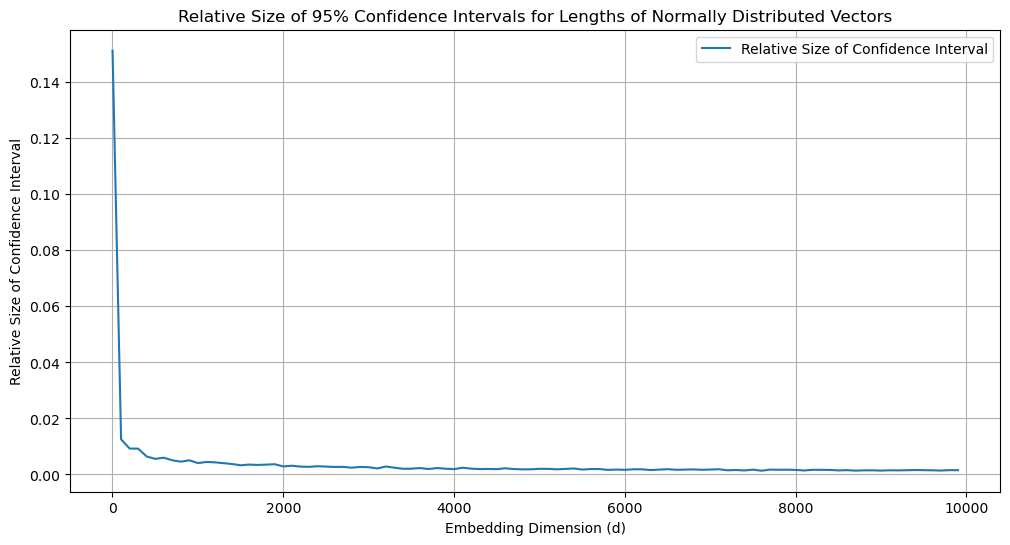

In [16]:
# Plotting the relative size of the confidence intervals

plt.figure(figsize=(12, 6))
plt.plot(relative_conf_interval_data['dimensions'], relative_conf_interval_data['relative_conf_interval_sizes'], label="Relative Size of Confidence Interval")
plt.xlabel("Embedding Dimension (d)")
plt.ylabel("Relative Size of Confidence Interval")
plt.title("Relative Size of 95% Confidence Intervals for Lengths of Normally Distributed Vectors")
plt.legend()
plt.grid(True)
plt.show()


### does RMSnorm also approach hypersphere?

In [3]:
def calculate_rmsnorm_and_confidence_interval(X):
    # Calculate RMSnorm for each vector
    rmsnorms = np.sqrt(np.mean(X**2, axis=1))

    # Calculate the average RMSnorm and the 95% confidence interval
    avg_rmsnorm = np.mean(rmsnorms)
    conf_interval = norm.interval(0.95, loc=avg_rmsnorm, scale=np.std(rmsnorms, ddof=1) / np.sqrt(len(rmsnorms)))
    
    return avg_rmsnorm, conf_interval

In [4]:
def analyze_relative_conf_interval_trend_rmsnorm(b=100, max_d=10000, step=100):
    # Initialize arrays to store the results
    dimensions = range(1, max_d+1, step)
    relative_conf_interval_sizes = []

    # Generate data and calculate relative confidence intervals for RMSnorm for each dimension
    for d in dimensions:
        X = np.random.normal(0, 1, (b, d))
        avg_rmsnorm, conf_interval = calculate_rmsnorm_and_confidence_interval(X)
        conf_interval_size = (conf_interval[1] - conf_interval[0]) / 2  # Average size of the confidence interval
        relative_size = conf_interval_size / avg_rmsnorm if avg_rmsnorm != 0 else 0
        relative_conf_interval_sizes.append(relative_size)

    # Prepare the data for statistical analysis
    relative_conf_interval_data = {
        "dimensions": list(dimensions),
        "relative_conf_interval_sizes": relative_conf_interval_sizes
    }

    return relative_conf_interval_data

# Run the analysis
relative_conf_interval_data = analyze_relative_conf_interval_trend_rmsnorm()


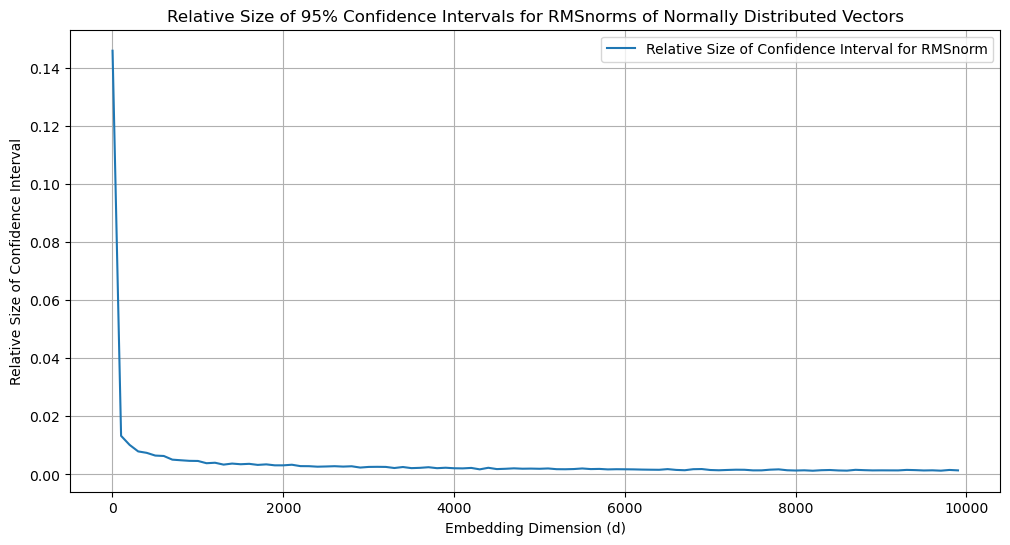

In [5]:
# Plotting the relative size of the confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(relative_conf_interval_data['dimensions'], relative_conf_interval_data['relative_conf_interval_sizes'], label="Relative Size of Confidence Interval for RMSnorm")
plt.xlabel("Embedding Dimension (d)")
plt.ylabel("Relative Size of Confidence Interval")
plt.title("Relative Size of 95% Confidence Intervals for RMSnorms of Normally Distributed Vectors")
plt.legend()
plt.grid(True)
plt.show()